## Exercise : check the evolution of errors



In one code, generate 100 times:

    Normal random trails of 10 elements with variance = 1
    Normal random trails of 100 elements with variance = 1
    Normal random trails of 1000 elements with variance = 1
Evaluate the mean of each realisation and then the standard deviation of the means for each group 100 realisations (1 stdev for 10 elements, one for 100 elements and one for 100 elements)

report the results of the 3 tandard deviations in one plot and compare with expected value $1./\sqrt(N)$ (because each trial is with variance = 1.)
    

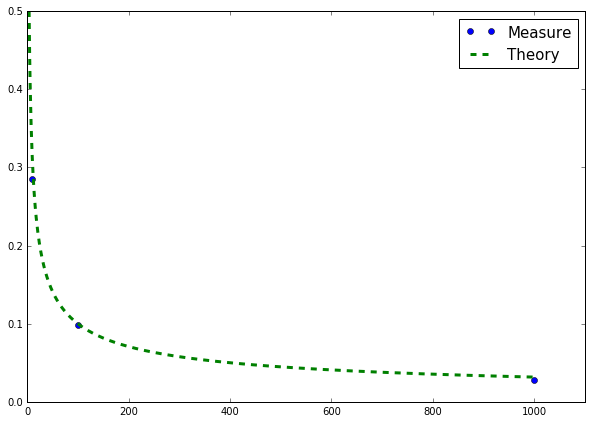

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nb_real = 100   #### number of realisations for each case of N elements 

#### Define arrays to storage the mean values 
mean10_arr = np.zeros(nb_real)
mean100_arr = np.zeros(nb_real)
mean1000_arr = np.zeros(nb_real)


##### generate the nb_real for 10, 100 and 1000 elements

for ii in range(nb_real):
    mean10_arr[ii] = np.mean( np.random.randn(10)*1.+10 )
    mean100_arr[ii] = np.mean( np.random.randn(100)*1.+10  )
    mean1000_arr[ii] = np.mean( np.random.randn(1000)*1.+10 )
    
std_arr = np.zeros( 3 )   #### to storage the standard deviation values
elements_arr = np.array( [10,100,1000] )

std_arr[0] = np.std(mean10_arr)
std_arr[1] = np.std(mean100_arr)
std_arr[2] = np.std(mean1000_arr)

x_theo_arr = np.linspace(1., 1000, 1000)
y_theo_arr = 1./np.sqrt(x_theo_arr)

plt.figure( figsize=(10,7) )
plt.plot(elements_arr, std_arr, 'o', label='Measure')
plt.plot(x_theo_arr, y_theo_arr, linestyle='--', label='Theory', lw=3)
plt.xlim( (0,1100) )
plt.ylim( (0,0.5) )
plt.legend(fontsize=15)
plt.show()


# Exercice : Random trial following a given PDF

The goal of this exercise is to generate a random trial following a Probabilty Distribution Function (PDF) I give you in the file: "PDF_double_gauss.txt".

**1)** Read the file "**PDF_double_gauss.txt**" (think to take a look to the file befor to know if you need to transpose or not when you use numpy.loadtxt). There 2 arrays : x_arr and pdf_arr. (ie. x and p(x)) 

**2)** Determine the size of the element dx 

**3)** Check that the sum pdf_arr * dx is close to 1 (in this case, the pdf is realy a pdf)

**4)** Construct the cumulative distribution function (CDF) in an array cumul_arr

**5)** plot the PDF and the CDF in two diferent plots

**6)** Using uniform random trials and the CDF from **4)**, generate 10000 random trials you will store in an array **myrand_arr**

**7)** Plot the normed (sum=1) histogram of your trials using numpy.hist, using 500 bins between. Overplot **pdf_arr**


dx =  0.01
np.sum(pdf_arr)* dx = 0.999984330623


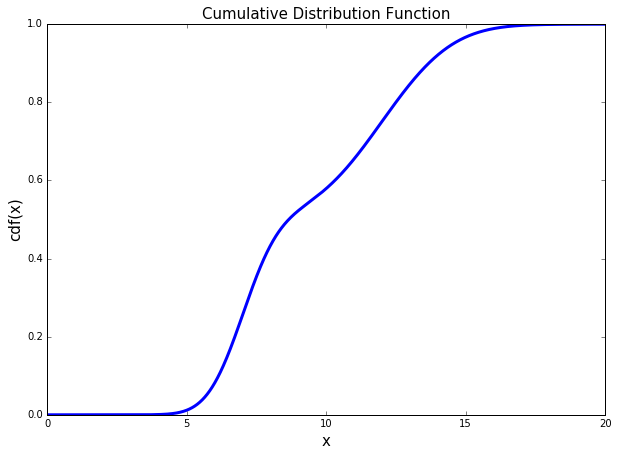

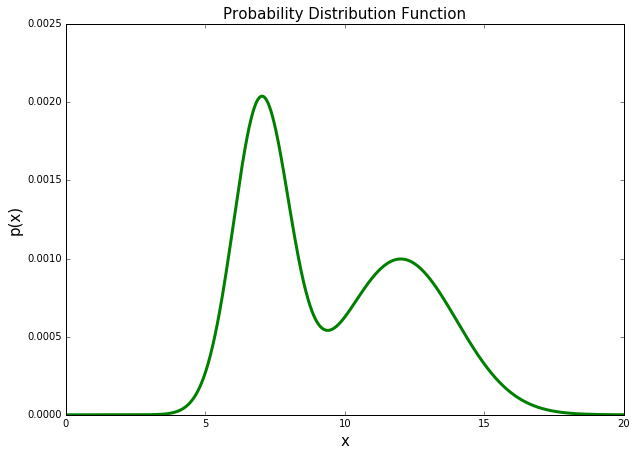

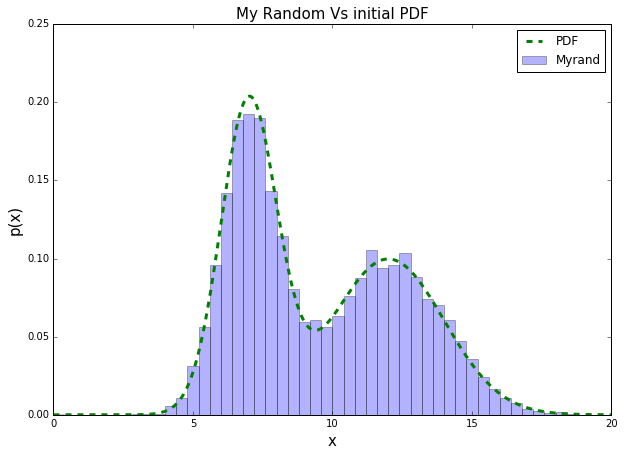

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


##### 1) ####
x_arr, pdf_arr = np.loadtxt('PDF_double_gauss.txt').T

##### 2) ####

dx = x_arr[1] - x_arr[0]
print "dx = ", dx

#### 3) ####

print "np.sum(pdf_arr)* dx =", np.sum(pdf_arr) * dx

#### 4) ####

cumul_arr = np.zeros(len(x_arr))

cumul_arr[0] = pdf_arr[0] * dx

for ii in range(len(cumul_arr)-1):   ##### we do not have to redo the ii=0
    jj = ii+1
    cumul_arr[jj] = cumul_arr[jj-1] + pdf_arr[jj] * dx

    
    
###### 5) ####

plt.figure( figsize=(10,7) )
plt.plot(x_arr, cumul_arr, linewidth=3)
plt.xlabel('x', fontsize=15)
plt.ylabel('cdf(x)', fontsize=15)
plt.title('Cumulative Distribution Function', fontsize=15)
plt.show()

plt.figure( figsize=(10,7) )
plt.plot(x_arr, pdf_arr * dx, linewidth=3, color='green')
plt.xlabel('x', fontsize=15)
plt.ylabel('p(x)', fontsize=15)
plt.title('Probability Distribution Function', fontsize=15)
plt.show()

#### 6) ####

nb_trials = 10000
myrand_arr = np.zeros(nb_trials)

uniform_arr = np.random.random(nb_trials)   ##### generate the 10000 trials of uniform random we will use

for ii in range(nb_trials):
    
    indx = np.argmin( np.abs(cumul_arr - uniform_arr[ii]) )    #### return the index of the CDF corresponding to the uniform random value
    myrand_arr[ii] = x_arr[indx]      ##### the value of myrand is simply the x value for the index encountered
    
##### 7) ####

plt.figure( figsize=(10,7) )
plt.hist(myrand_arr, bins=50, range=(0,20), normed=True, alpha=0.3, label='Myrand' )
plt.plot(x_arr, pdf_arr, linestyle='--', linewidth=3, color='green', label='PDF')
plt.xlabel('x', fontsize=15)
plt.ylabel('p(x)', fontsize=15)
plt.title('My Random Vs initial PDF', fontsize=15)
plt.legend()
plt.show()
    
